# An Introduction to Probability-Based Statistics!

In [57]:
# Some Handy Dandy Import Statements to Start Off Our Handy Dandy Little Tutorial
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

---

In this class, we're going to extend our discussion of descriptive statistics to enter the world of probability-based analysis.

_Probability and Statistics_ are two sides of the same coin: a brilliant, shining coin with the power to _end all global problems forever and make you rich_.

Now, in all seriousness, to truly understand data and its ever vast symphony of insights just waiting for analysts to extract them, one must understand the relationship between probability, statistical thinking, and data.

But before we get into probability and statistics, let's wrap up our knowledge of descriptive statistics and build a bridge into the realm of statistical thinking by talking about **data distributions** and **density functions**.

## Distributions and  Density Functions

By now, you've probably seen all kinds of datasets with unique distributions. 

It's no secret that there tend to be... *patterns* regarding the shape that some data assume. 

How can we apply our understanding of descriptive statistics and mathematical inference to learn more about how data is distributed?

Well, up until this point, we've been running our analyses and visualizations on discretized data models. 

That's right, all the data we've looked at so far we've been thinking of like a **jar of cookies**, with every data point being like a single cookie in the jar.

However, we can do a whole lot more statistical inference by treating our data like a **bucket of water**, with infinitely minute changes and assumed variances across our data.

Let's go through an example and introduce density functions to help this way of thinking.

In [23]:
# TODO: Import the Titanic dataset and run some basic lookups to make sure we have the correct data. 

PATH = "./titanic.csv"
df = pd.read_csv(PATH)

And as always, let's take a quick look at the head of our data to make sure everything went well!

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now that we know we're working with the appropriate data, for today's exercise, we only really want to look at the **Age** data across our dataset. 

Let's grab the `Age` column of our data and save it to a new object.

In [25]:
df_ages = df["Age"]
df_ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Before we go any further, we should really make sure our data is cleared of all NaN values. 

For this exercise, we don't want to concern ourselves with NaNs and would prefer simply dropping them.

So let's drop them!

In [26]:
df_ages = df_ages[~np.isnan(df_ages)]
df_ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Now, what we want to do is we want to immediately visualize our data. 

Preferably, let's use a Seaborn histogram to check out what our data's distribution looks like!

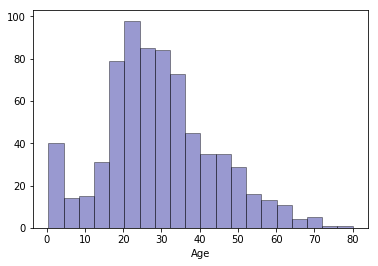

In [49]:
# TODO: Run this code cell to see the visualization below!
sns.distplot(df_ages, hist=True, kde=False,
             bins=20, color="darkblue",
             hist_kws={"edgecolor": "black"},
             kde_kws={"linewidth": 3})

We're used to seeing data distributions like this before.

However, want we want to see is how we can convert data that's obviously discretized and unitized into something more fluid and contiguous. 

**In the previous cell, change the** `kde=False` **argument to say** `kde=True` **and observe the changes made!**

Notice the new function line imposed above our histogram?

This is called a ***Kernel Density Function*** or ***Probability Density Function***. 

Understanding exactly what means isn't too important, but what is important is to understand that a density function is simply a mathematical approximation as to the expected shape and layout of our data if we had _infinite data points_ that follow our dataset's distribution.

As we saw in the last in-class notebook, getting the exact values for percentile and relative position across our data can be pretty tricky – even with the most complex mathematical structure we can come up with – if we're only dealing with discontinuous, discretized data.

But by applying a density function to our data and assuming a continuity in values, we can get **much more specific and relevant** measures of relative position and descriptive statistics from our data!

Let's see how that works with a little bit of SciPy Stats module trickery!

We want to know the area under and over the curve at a certain age, and we want to know the *exact values* of both.

That means our methods that we built last notebook, while effective to an extent, are no longer satisfactory.

We need to call in some backup! `SciPy Stats` to the rescue!

### _Use the following function regarding density function calculations to answer the questions below._

To compute the cumulative area to the **left** of a data point, use the **cumulative density function**.
<br>
<center>`st.norm.cdf()`</center>
<br>

To compute the cumulative area to the **right** of a data point, use the **survival function**.
<br>
<center>`st.norm.sf()`</center>
<br>

NOTE: Don't worry too much about what these are doing under the hood, we'll talk about that at a later date! 

In [74]:
data = df_ages.values.flatten()

def compute_percentiles_with_pdf(dataset, value, area="left"):
    """ Main function to determine percentile/quartile ranges using PDF/KDF estimators. """
    mean, std_dev = np.mean(dataset), np.std(dataset)
    Z = (value - mean) / std_dev
    if area == "left":
        return stats.norm.cdf(Z)
    if area == "right":
        return stats.norm.sf(Z)

# TODO: Uncomment the following line to answer the questions below!
# compute_percentiles_with_pdf(data)

- What is the **exact percentile** at the age of 35?

`Write your response here!`

- What is the **exact percentile** at the age of 77?

`Write your response here!`

- What **exact proportion of data** is between the age range of 45 and 55?

`Write your response here!`

- **Exactly how much of our data** is above the age of 25?

`Write your response here!`

- What **exact proportion of data** is below the age of 10 and above the age of 60?

`Write your response here!`

Now we have a function and some tools that can get us relative positional data values based on percentile in an exact nature! 

We'll discuss soon how and why this matters as we dive into statistical inference and deeper analytical thinking!

---

## A Brief Introduction to Probabilistic Thinking

Probability is all about the **chances of an event occurring** or how likely an event is to occur, in a set of events.

If you really think about it, you've been thinking about probability all of your life! 

Ever wondered about...

> -  The chances of it raining today
> -  The chances of winning the lottery
> -  The chances of getting hired at Google

That's probabilistic thinking! 

We can draw immediate connections from the world of probabilistic thinking to the world of statistical inference and analysis.

In mathematics, probability is modeled by the following expression:

$P(A)= \frac{Count of A }{sample Space}$

Don't fear at the sight of equations and non-numerical variables – this is much simpler than it looks! 

All this translates to is that **the probability of Event A occurring** in a set of observed events in _Sample Space S_ is equal to **the number of occurrences of Event A** across _Sample Space S_ divided by **the total number of observed events**. 

Note that since the number of occurrences of a single event can never be bigger than the total events that can occur in the sample space, the probability of an event will always be within the range: [0, 1].

The closer our probability estimate is to zero (0), the less likely it is for our event in-question to occur, with a value of zero (0) indicating that our observed event didn't occur at all. 

The closer our probability estimate is to one (1), the more likely it is for our event in-question to occur, with a value of one (1) indicating that our observed event occurs in every observable instance.


<img src="https://www2.southeastern.edu/Academics/Faculty/dgurney/Math241/StatTopics/PrbScl4.jpg" />

You'll often see this represented in data sets in a number of formats. 

Here are some examples:

| Won Lottery |
| ----|
| yes |
| no  |
| no  |
| no  |

<br>

| Hired by Google |
|------|
| false|
| true |
| true |
| false|

<br>

Any kind of distribution of values where our data can take one of multiple, separately-occurring states indicates that we can think about the probability of each state (event) occurring on its own! 

## Conditional Probability

Probability on the surface simply describes the likelihood of individual events, but one concept we haven't spoken about yet is whether or not certain events are **dependent** on one another or not. 

As it turns out, understanding the interdependency of event occurrences is critical to fully grasping the role of probability and statistics in data science.

Let's start with some conceptual examples.

### Flip a coin three times. What is the probability of each event (H/T) occurring for each coin flip?

As you're likely already aware of, we consider the probability of each event occurrence across multiple trials to be **independent**. 

In other words, the occurrence of one coin flip _does not influence_ the occurrence of another coin flip in any way. 


***


Now let's think on that... if the events were not independent – rather, they were **dependent** events – what would we have to consider with each subsequent coin flip's probabilistic outcomes?

We would likely have to consider that every _N_-th trial of our test affects the probability of the outcomes of every (_N + 1_)-th trial.

If that doesn't make much sense or is still a little unclear, have no fear. 

This is when probability and statistics gets *funky*!

### Dependent Events

Consider we have a bag of marbles: two are **blue**, and three are **red**.

We can ask a simple probabilistic question: 

### _What is the probability of drawing a red marble?_ 

We can model the probability of each outcome as the following:

<img src="https://www.mathsisfun.com/data/images/probability-marbles-tree1.svg" />

Notice that the probability of each outcome occurrence at the start is the number of marbles of one color divided by the total number of marbles. 

However, let's extend this problem and think more critically with the following, more complicated question:

### _What is the probability of drawing another red marble?_

This may seem simple enough, but consider that the question is particularly asking about drawing "_another red marble_". 

That means that the probability of drawing the second red marble is **inherently dependent** on the probability of drawing the first red marble!

This poses a more interested case that can be modeled by the following diagram:

<img src="https://www.mathsisfun.com/data/images/probability-marbles-tree2.svg" />

This probability outcomes diagram represents all the possible outcomes present over two trials of drawing marbles from the bag, with an important stipulation:

_Since we are not putting the first marble back into the bag, the probability outcomes for a second marble pick are dependent on the outcomes of the first marble picks!_

So let's start with an easier dependent probabilities question that'll illustrate how probabilities can affect one another.

### _What is the probability of drawing two red marbles?_

Let's carefully consider the question. 

In this case, we don't care about each independent event as much as we care about the outcome of two red marbles. 

This means that we can simply grab the **product of all relevant probabilities**. 

In this case, that means that the _probability of drawing two red marbles_ is $ \frac{3}{5} * \frac{2}{4} $, which is equal to $ \frac{3}{10} $ or 30%.

---

However, this is just the tip of the iceberg. 

Let's consider a more advanced probability question, now bringing more conditional probability into the mix.

### _What is the probability of drawing a blue marble given that a red marble was originally drawn?_

Let's carefully break this down, as things are not as simple as they seem.

We want to know the _probability of drawing a blue marble_ given that _the event of drawing a red marble_ has already occurred.

This is known in statistics as **conditional probability**, as it is attempting to determine a probabalistic outcome given a certain conditional event occurrence.

In other words, given that a red marble was drawn, what is the chance of drawing a blue marble?

In this case, we can simply observe the state of the bag after having drawn the previous red marble and calculate the probability of drawing the blue marble.

Which in this case, since drawing a red marble leaves _two blues_ and _two reds_, the probability of then drawing a blue marble is $ \frac{1}{2} $. 

### In general cases, the conditional probability of an event is described by the following equation.

<br><img src="https://www.mathsisfun.com/data/images/probability-independent-formula2.gif" /><br>

This can be described as **the probability of event B given event A** is equal to _the probability of events A and B occurring_ divided by _the probability of event A_. 

Let's look at an example.

### _Example Question: I Scream for Ice Cream_

70% of your friends like Chocolate, and 35% like Chocolate AND like Strawberry.

What percent of those who like Chocolate also like Strawberry?

Another way to refactor the question to fit our conditional probability model:

- Given that some friends like _Chocolate_, what is the probability that they like _Strawberry_ as well?

We can now attribute our events to the question parameters!

- **Event A: Chocolate**
- **Event B: Strawberry**

We're already given the following:

- $ P( Chocolate ) = 0.7 $
- $ P( Chocolate \cap Strawberry) = 0.35 $

And asked the following:

- $ P( Strawberry \mid Chocolate ) = ? $

Therefore, our conditional probability model now looks a little like this:

$ P( Strawberry \mid Chocolate ) = \frac{P( Chocolate \cap Strawberry )}{P( Chocolate )} $

Plugging in our parameters gives us the following answer:

$ P( Strawberry \mid Chocolate ) = \frac{0.35}{0.7} = 0.5 $

...which confirms to us that 50% of your friends who like chocolate also like strawberry. 

Makes sense when you think about it! 

### _Answer the following questions using the Titanic dataset and your understanding of Conditional Probability._

- What percentage of passengers survived *given* that they were male?

`Write your response here!`

- What percentage of passengers paid more than $50 *given* that they embarked in Cherbourg?

`Write your response here!`

- What percentage of passengers died *given* that they had siblings/spouses OR had parents/children with them on board?

`Write your response here!`

In [89]:
df = pd.read_csv(PATH)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
# TODO: Answer the following questions using conditional probability statements.
# NOTE: To make it clearer, I advise using conditional probability arguments like so...

# EXAMPLE: What proportion of passengers died, given that they were female?
arg_female = (df["Sex"] == "female")
females = df[arg_female]

arg_females_died = (females["Survived"] == 0)
percent_died_given_female = len(females[arg_females_died]) / len(females)
print("Percentage of passengers who died given that they're female: {}%".format(round(100 * percent_died_given_female, 2)))

# TODO: WRITE YOUR CODE TO ANSWER THE ABOVE QUESTIONS HERE:


Percentage of passengers who died given that they're female: 25.8%


Now that we've worked through enough of probability, let's change topics to something a little more directly relevant in data science: the ***Normal Distribution***. 

---

## The Normal Distribution 

By now, we should have some familiarity of the types of distributions that we see in data science. 

After all, distributions are just arrangements of data values in space, and we're interested as data science to detect patterns in that space! 

There is one distribution that requires a good amount of attention, due to its relevance in data science for statistical inference and analysis.

That is the ***Normal (Gaussian) Distribution***, otherwise known as the Bell Curve model.

<br><img src="https://ds055uzetaobb.cloudfront.net/image_optimizer/1dbcc5a80e3fb541aa4678fcff58bb26ca717902.png" /><br>

The Normal Distribution has several properties pertaining to its spread and central tendency that make it distinctive and unique across nearly all other distributive types. 

### Central Tendency

As it turns out, the Normal Distribution is unique in that it is one of the few distributions where the three key measures of central tendency are _equivalent_.

That's right: **the mean, median, and mode for a Normal Distribution are all the same value**.

You can probably guess that it's the value at the dead center of the Normal Distribution, and you'd be right! 

It's the value that simultaneously is the average value, middle value, and most commonly occurring value across your data. 

This allows us to make inferences regarding the data's distribution, including but not limited to the following:
- Symmetry across the center value
- Graphical peak at the mean/median/mode
- Tails get progressively smaller

### Variance and Spread

The Normal Distribution also is unique in having a direct known relationship between the standard deviation and the range of data captured across the dataset. 

In other words, **the standard deviation for a Normal Distribution can tell you how much data is contained within its bounds**. 

This is often called _the 68-95-99.7 Rule_. 

<br><img src="http://www.oswego.edu/~srp/stats/images/normal_34.gif" /><br>

As you can see, we see different degrees of data captured within bounds that are created by the standard deviation. 

So to make it clear:
- 68% of the data is captured within one standard deviation from the mean.
- 95% of the data is captured within two standard deviations from the mean.
- 99.7% of the data is captured within three standard deviations from the mean.

This makes it very effective for statistical testing and analysis to be able to grab set quantities of data using the standard deviation.

Next class, we'll connect our understanding of the Normal Distribution with more complex statistical topics to give you even more power in manipulating, analyzing, and understanding your data.

**Excelsior!**